In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


"""
Build automatic contrast enhancement
Resource: https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html
"""
img = cv2.imread('/Users/agerasymchuk/private_repo/cv_claude_course/cv_course/images/IMG_1814_darker.jpg', cv2.IMREAD_GRAYSCALE)



In [21]:
hist, bins = np.histogram(img.flatten(), 256, (0, 256))

In [22]:
cdf = hist.cumsum()

cdf_normalized = cdf * float(hist.max()) / cdf.max()


/var/folders/vw/z1y8jp6s5kl9swddwzhxfb6h0000gn/T/ipykernel_41485/3186130973.py:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.flatten(), 256, (0, 256), color='r')


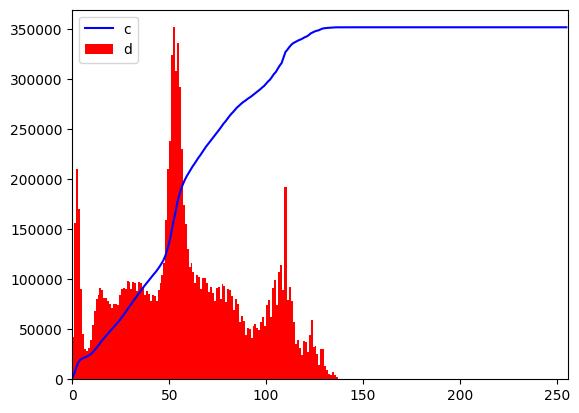

In [23]:
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, (0, 256), color='r')
plt.xlim((0, 256))
plt.legend('cdf histogram', loc='upper left')
plt.show()



In [10]:
hist.max(), hist.min(), hist.std(), hist.mean()

(np.int64(201592),
 np.int64(35),
 np.float64(35852.47867302901),
 np.float64(47628.0))

In [24]:
cdf_m = np.ma.masked_equal(cdf, 0)


In [37]:
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf_n = np.ma.filled(cdf_m,0).astype('uint8')


In [45]:
img2 = cdf_n[img]

/var/folders/vw/z1y8jp6s5kl9swddwzhxfb6h0000gn/T/ipykernel_41485/2844914321.py:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img2.flatten(), 256, (0, 256), color='r')


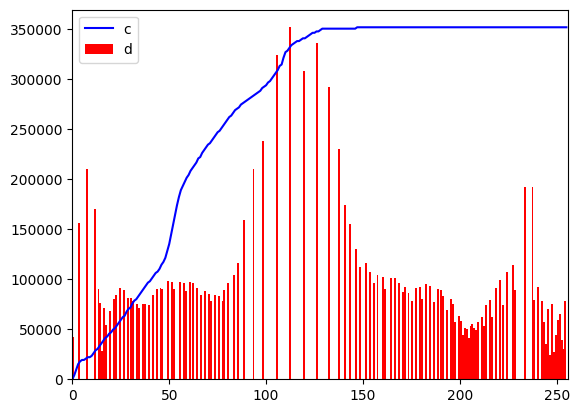

In [47]:
cdf_normalized = cdf_n * float(hist.max()) / cdf_n.max()
plt.plot(cdf_normalized, color='b')
plt.hist(img2.flatten(), 256, (0, 256), color='r')
plt.xlim((0, 256))
plt.legend('cdf after equalization', loc='upper left')
plt.show()

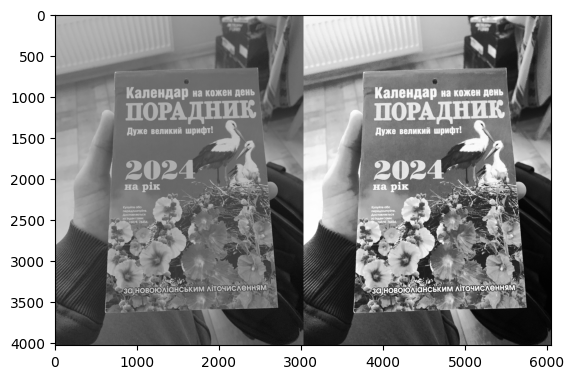

In [51]:
# opencv approach
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
plt.imshow(res, cmap='grey')

In [52]:
# clahe

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cla = clahe.apply(img)

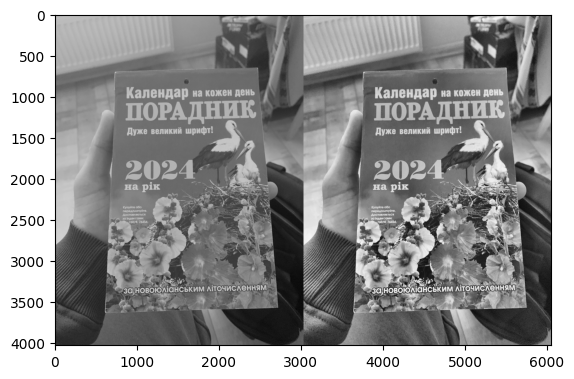

In [53]:
res = np.hstack((img, cla))
plt.imshow(res, cmap='grey')